# More functions on Series
    
* groupby()
* reset_index()
* pivot()

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4.5) # To set teh plot figure size
%config InlineBackend.figure_format = 'retina'

In [8]:
fuel_econ = pd.read_csv("MatplotlibSeaborn/fuel-econ.csv")
print(fuel_econ.shape)
fuel_econ.head(4)

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0]) 

(3929, 20)


In [11]:
ct_counts = fuel_econ.groupby(['VClass','trans_type']).size()  # group type by vclass 
ct_counts

VClass            trans_type
Compact Cars      Automatic     784
                  Manual        338
Large Cars        Automatic     605
                  Manual         20
Midsize Cars      Automatic     989
                  Manual        199
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
dtype: int64

In [12]:
ct_counts = ct_counts.reset_index(name='count') # reset_index converts into a pandas series function
ct_counts

,VClass,trans_type,count
0,Compact Cars,Automatic,784
1,Compact Cars,Manual,338
2,Large Cars,Automatic,605
3,Large Cars,Manual,20
4,Midsize Cars,Automatic,989
5,Midsize Cars,Manual,199
6,Minicompact Cars,Automatic,188
7,Minicompact Cars,Manual,133
8,Subcompact Cars,Automatic,502
9,Subcompact Cars,Manual,171


In [15]:
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count') # rearrange rows, cols
ct_counts

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


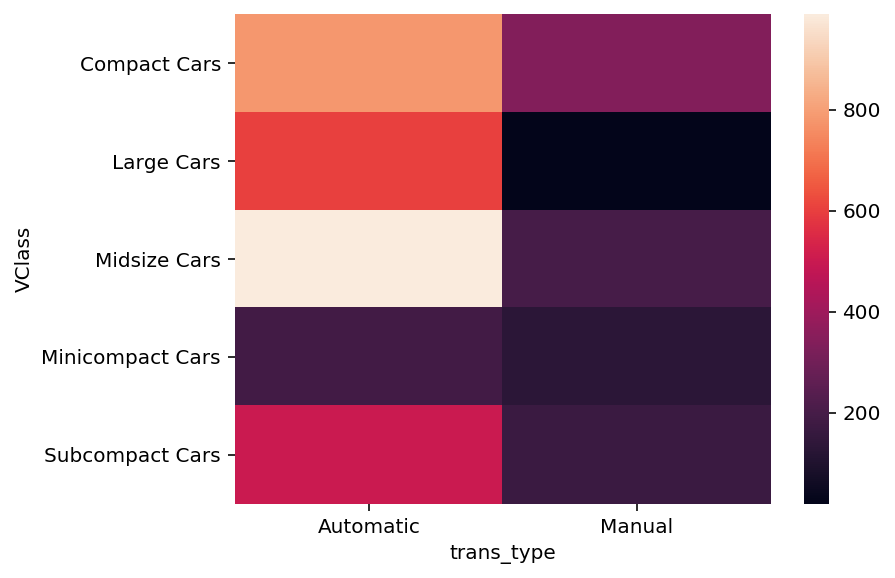

In [16]:
sb.heatmap(ct_counts)